In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris=pd.read_csv('iris.csv')

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.sample(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
20,21,5.4,3.4,1.7,0.2,Iris-setosa
144,145,6.7,3.3,5.7,2.5,Iris-virginica
92,93,5.8,2.6,4.0,1.2,Iris-versicolor


In [6]:
iris.isnull()==True

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [7]:
iris.isnull().values.any()

False

In [8]:
m = 0
c = 0
alpha = 0.01
# learninig rate: alpha

The algorithm starts with some value of m and c (usually starts with m=0, c=0). We calculate MSE - Mean Squared Error (cost) at point m=0, c=0. Let say the MSE (cost) at m=0, c=0 is 100. Then we reduce the value of m and c by some amount (Learning Step). We will notice a decrease in MSE (cost). We will continue doing the same until our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy).

1. Let m = 0 and c = 0. Let L be our learning rate. It could be a small value like 0.01 for good accuracy.

Learning rate gives the rate of speed where the gradient moves during gradient descent. Setting it too high would make your path instable, too low would make convergence slow. Put it to zero means your model isn’t learning anything from the gradients.

2. Calculate the partial derivative of the Cost function with respect to m. Let partial derivative of the Cost function with respect to m be Dm (With little change in m how much Cost function changes).

In [9]:
X = iris['SepalLengthCm'].values

In [10]:
X

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [11]:
Y = iris['PetalLengthCm'].values

In [12]:
Y

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [13]:
len(X)

150

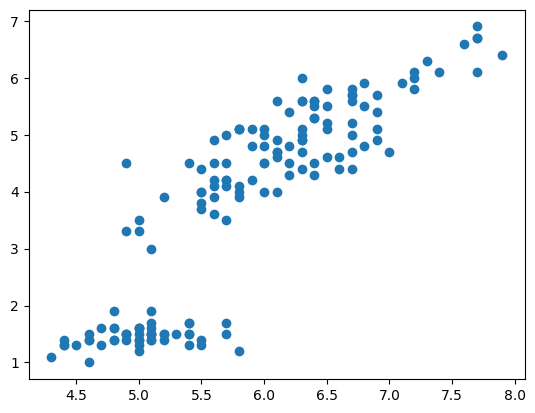

In [14]:
plt.scatter(X, Y)
plt.show()

In [15]:

def Gradient_Descent(X, Y, m, c, alpha, iters):
    
    dm = 0
    dc = 0
    
    n = len(X)
    
    for j in range(iters):
        
        for i in range(n):
            y_pred_i = m*X[i] + c
            
             # dj = (1/2*n)*(y_pred - Y[i])**2
            
            dm = dm + (Y[i] - y_pred_i)*X[i]
            dc = dc + (Y[i] - y_pred_i)
            
        dm = (-1*2/n)*dm
        dc = (-1*2/n)*dc
        
        m = m - alpha*dm
        c = c - alpha*dc
    
    return m, c

In [16]:
m = 0
c = 0

alpha = 0.01

iters = 10000

m_final, c_final =  Gradient_Descent(X, Y, m, c, alpha, iters)

print(f"Final M:{m_final} and Final C:{c_final}")

Final M:1.829210537829152 and Final C:-6.926813707832797


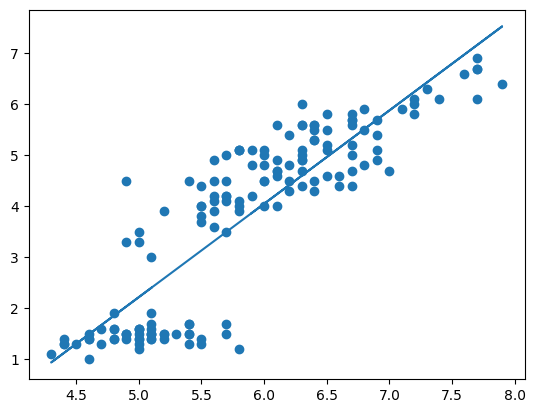

In [17]:
plt.scatter(X, Y)

y_pred = m_final*X + c_final
plt.plot(X, y_pred)

plt.show()
